# Proyecto: Métodos de minería de datos en Python
  
por: 
* María Paula Vargas R
* Jeisson F Castañeda G
  
16 de septiembre de 2021
# Introducción.  
Los materiales superconductores son aquellos que, bajo ciertas condiciones, tienen la capacidad de conducir corriente eléctrica sin ninguna resistencia ni pérdida de energía  

# Base de datos.

La base de datos extraída de UC Irvine Machine Learning Repository contiene la información de 21263 superconductores y sus 81 características más relevantes que se tomaron en la University of Pennsylvania.
  
# Objetivo

El objetivo de la base es predecir la temperatura crítica en función de las características relevantes.
  



In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#4/1AX4XfWhtheqLmtZsK6b4ZW40zHVFm4C4nI0O6AzX0u59evXoMKpywfOMaCg

In [ ]:
#https://drive.google.com/file/d/18G55Oybe-ikum5JRBiDeDyReJ7tGR8s3/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'18G55Oybe-ikum5JRBiDeDyReJ7tGR8s3'})
fileDownloaded.GetContentFile('Datos.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn import metrics
!pip install -U -q PyDrive

In [ ]:
df1 = pd.read_csv('Datos.csv')
df1.head()

number_of_elements  mean_atomic_mass  ...  wtd_std_Valence  critical_temp
0                   4         88.944468  ...         0.437059           29.0
1                   5         92.729214  ...         0.468606           26.0
2                   4         88.944468  ...         0.444697           19.0
3                   4         88.944468  ...         0.440952           22.0
4                   4         88.944468  ...         0.428809           23.0

[5 rows x 82 columns]

In [ ]:
# Preprocesamiento de datos #
#Tipo de datos
df1.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [ ]:
#Datos faltantes
for col in df1.columns:
    num_missing = df1[col].isnull().sum()
    pct_missing = np.mean(df1[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

number_of_elements - 0.0% - 0
mean_atomic_mass - 0.0% - 0
wtd_mean_atomic_mass - 0.0% - 0
gmean_atomic_mass - 0.0% - 0
wtd_gmean_atomic_mass - 0.0% - 0
entropy_atomic_mass - 0.0% - 0
wtd_entropy_atomic_mass - 0.0% - 0
range_atomic_mass - 0.0% - 0
wtd_range_atomic_mass - 0.0% - 0
std_atomic_mass - 0.0% - 0
wtd_std_atomic_mass - 0.0% - 0
mean_fie - 0.0% - 0
wtd_mean_fie - 0.0% - 0
gmean_fie - 0.0% - 0
wtd_gmean_fie - 0.0% - 0
entropy_fie - 0.0% - 0
wtd_entropy_fie - 0.0% - 0
range_fie - 0.0% - 0
wtd_range_fie - 0.0% - 0
std_fie - 0.0% - 0
wtd_std_fie - 0.0% - 0
mean_atomic_radius - 0.0% - 0
wtd_mean_atomic_radius - 0.0% - 0
gmean_atomic_radius - 0.0% - 0
wtd_gmean_atomic_radius - 0.0% - 0
entropy_atomic_radius - 0.0% - 0
wtd_entropy_atomic_radius - 0.0% - 0
range_atomic_radius - 0.0% - 0
wtd_range_atomic_radius - 0.0% - 0
std_atomic_radius - 0.0% - 0
wtd_std_atomic_radius - 0.0% - 0
mean_Density - 0.0% - 0
wtd_mean_Density - 0.0% - 0
gmean_Density - 0.0% - 0
wtd_gmean_Density - 0.0% - 0


In [ ]:
# descripción
df1['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

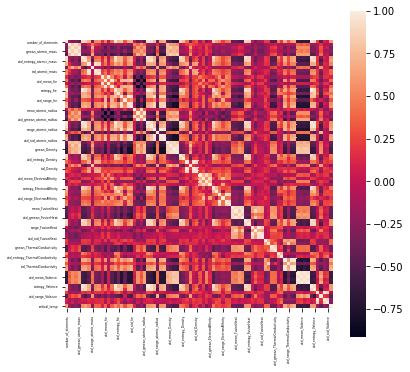

In [ ]:
#Obsevar correlación
corr_matrix = df1.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)

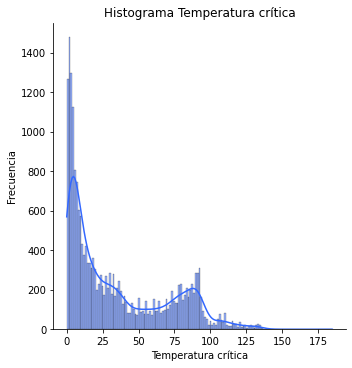

In [ ]:
y=df1['critical_temp']
n_data = len(df1)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
sns.displot(y, color='#3368FF', bins=n_bins, kde=True) #creamos el gráfico en Seaborn
plt.ylabel('Frecuencia')
plt.xlabel('Temperatura crítica')
plt.title('Histograma Temperatura crítica')
plt.show()

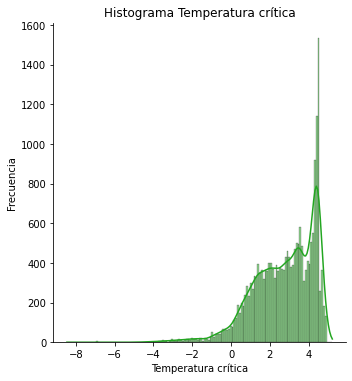

In [ ]:
#trasnformación de los datos (ln)
rr = map(math.log, y)
a = list(rr)
sns.displot(a, color='#23A621', bins=n_bins, kde=True) #creamos el gráfico en Seaborn

plt.ylabel('Frecuencia')
plt.xlabel('Temperatura crítica')
plt.title('Histograma Temperatura crítica')
plt.show()

In [ ]:
# Modelo Lineal con todos los datos
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X = df1.drop(['critical_temp'], axis=1)
y = a
linreg.fit(X, y)
y_pred = linreg.predict(X)

In [ ]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))

RMSE:  0.8372564559604129


Text(0.5, 1.0, 'Actual vs predicciones (Regresión lineal)')

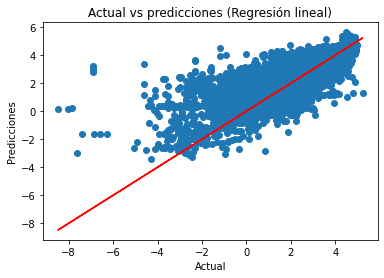

In [ ]:
plt.scatter(y, y_pred)
plt.plot(y, y, color ='r')
plt.xlabel("Actual")
plt.ylabel("Predicciones")
plt.title("Actual vs predicciones (Regresión lineal)")

In [ ]:
# Selección de variables con regresión Lasso
# alpha=0.01
from sklearn.linear_model import Lasso
xt = df1.drop(['critical_temp'], axis=1)
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(xt, a)
print(lassoreg.coef_)

[ 0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0.  0.
  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0.
 -0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0. -0.
 -0. -0. -0.  0.  0. -0. -0. -0. -0.]


In [ ]:
# alpha=0.001
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(xt, a)
#print(lassoreg.coef_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#validacion crusada 30% test
from sklearn.model_selection import train_test_split
X = xt
y = a
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.941215752649, tolerance: 3.657231838317532
  positive)


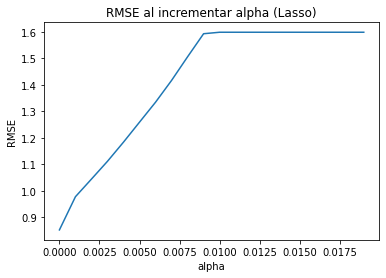

In [ ]:
# variar hiperpárametro
xv = np.arange(0,0.02,0.001)
ff = np.empty(len(xv))
t = 0
for i in xv:
  lassoreg = Lasso(alpha=xv[t], normalize=True)
  lassoreg.fit(X_train, y_train)
  y_pred = lassoreg.predict(X_test)
  ff[t] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  t = t+1
# Gráfico RMSE al incrementar alpha de la regresión Lasso
plt.plot(xv, ff)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.title('RMSE al incrementar alpha (Lasso)')
plt.show()

In [ ]:
lassoreg = Lasso(alpha=0.003, normalize=True)
lassoreg.fit(X_train, y_train)
#print(lassoreg.coef_)
y_pred = lassoreg.predict(X_test)


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.111260439941939


In [ ]:
lassoreg = Lasso(alpha=0.0001, normalize=True)
lassoreg.fit(X_train, y_train)
#print(lassoreg.coef_)
y_pred = lassoreg.predict(X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8946553538656817


Text(0.5, 1.0, 'Actual vs predicciones (Lasso)')

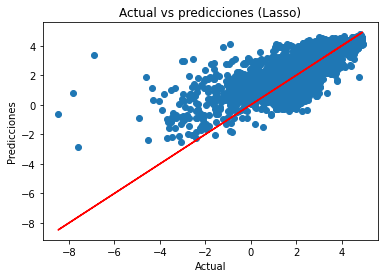

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color ='r')
plt.xlabel("Actual")
plt.ylabel("Predicciones")
plt.title("Actual vs predicciones (Lasso)")

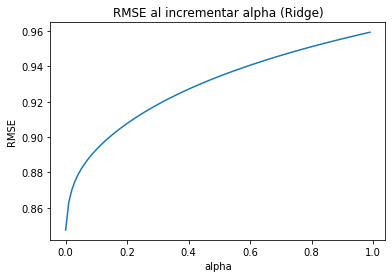

In [ ]:
# variar hiperpárametro
xv = np.arange(0,1,0.01)
ff = np.empty(len(xv))
t = 0
for i in xv:
  ridgereg = Ridge(alpha=xv[t], normalize=True)
  ridgereg.fit(X_train, y_train)
  y_pred = ridgereg.predict(X_test)
  ff[t] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  t = t+1
# Gráfico RMSE al incrementar alpha de la regresión Lasso
plt.plot(xv, ff)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.title('RMSE al incrementar alpha (Ridge)')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.0001, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8482029668602413


In [ ]:
#print(ridgereg.coef_)

In [ ]:
#Modelo lineal con validacion cruzada
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [ ]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  0.8475223021682515


Text(0.5, 1.0, 'Actual vs predicciones (LinearRegression)')

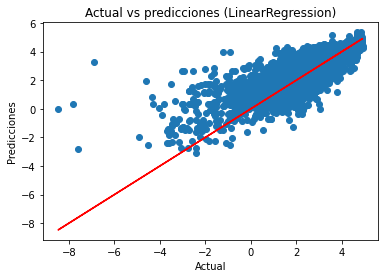

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color ='r')
plt.xlabel("Actual")
plt.ylabel("Predicciones")
plt.title("Actual vs predicciones (LinearRegression)")

#Conclusiones  
* Se copararon los métodos de Lasso, Ridge y LinearRegression con validación cruzada simple, se encontró que el modelo que presenta menor RMSE (Distancia media cuadrática mínima) es el modelo mediante LinearRegression.  
* Al no tener un criterio claro en la selección de variables el modelo de regresión lineal que resulto contiene 81 variables.  
* En el histograma se observa que los superconductores se podrían clasificar antes de realizar una regresión 